**Business Question: Having a porch increases home sale price**

**H<sub>0</sub> =Home sale price will decrease of reamin the same if it has a porch.**

**H<sub>A</sub>= Home sale price will increase if the propery has a porch.**

In [3]:
import pandas as pd
import matplotlib as plt
import numpy as np
from statsmodels.formula.api import ols
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", 0)
#add auto reload for src function testing
%load_ext autoreload
%autoreload 2

#let's add the project directory to our module path
import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
    
#also import all of our modules
import pandas as pd
import numpy as np
from src import data_cleaning
from src import cm_functions

#and here is our data directiory
data_folder = '../../data/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Initial import of 2019 Sales and Residential data.

In [6]:
sales_2019=pd.read_csv('../../data/EXTR_RPSale_2019.csv',dtype={'ExciseTaxNbr': 'string','Major': 'string','Minor': 'string','PIN':'string'})
PINS=pd.read_csv('../../data/PINS.csv',dtype={'ExciseTaxNbr': 'string','Major': 'string','Minor': 'string','PIN':'string'})
bldinfo_2019 = pd.read_csv('../../data/EXTR_ResBldg_2019.csv', dtype={'Major': 'str', 'Minor':'str', 'ZipCode': 'str','PIN':'string'})

**Now we need to filter our data on what we perceive to be actual sales.** 
**Exlusions:** Assumptions,Mortgage Assumption, Foreclosure,Trust,Executor-to admin guardian,Testamentary Trust,Estate,Settlement,Settlement, Property Settlement,Divorce Settlement
, Tenancy Partition, Community Prop Established, Partial Int - love,aff,gft,Easement, Correction (refiling),Trade,Quit Claim Deed - gift/full or part interest

In [7]:
actual_sales=sales_2019[(sales_2019["SaleReason"]==1)|(sales_2019["SaleReason"]==18)]
actual_sales

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
0,257,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C,SHAW HEATHER C,11,6,3,N,N,N,N,1,8,,2130430120
1,302,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL,HANSON BRYAN L+KAILI,11,6,3,N,N,N,N,1,8,,9406520630
2,465,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,,,,BRASHER DAVID+MONIQUE A,SEITZ ANDREW+MODELSKI EVE,3,6,3,N,N,N,N,1,8,,1402810020
3,482,3015516,779790,0030,2019-10-07,0,20191016000009,,,,,,,HEUTMAKER JOSEPH E+LINDA A,STONE AVENUE HOUSE LLC,11,6,3,N,N,N,N,1,8,,7797900030
4,594,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,,,,LEWIS WILBERT,TALOFA LLC,3,6,15,N,N,N,N,18,8,18 51 52,1245500098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42675,2087770,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,,,,PREMIER LOTS 2 LLC,RUSSELL ALBERT,11,6,3,N,N,N,N,1,8,,4059400095
42676,2087773,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,,,,HIRAGA SHYOKO,STOECKMANN DOUGLAS A,11,6,3,N,N,N,N,1,8,,3816700025
42677,2087774,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,,,,KYLE JASON C+HEATHER,SAYAH MICHAEL+PRIYA,11,6,3,N,N,N,N,1,8,,6150200505
42678,2087900,2997920,302300,0320,2019-05-01,0,20190705000539,,,,,,,PEDERSEN LOLITA M,PEDERSEN MICHAEL J,11,6,15,N,N,N,N,1,8,,3023000320


# Now one more filter to only display residential sale

In [8]:
res_sales=actual_sales[(actual_sales["PropertyClass"]==7)|(actual_sales["PropertyClass"]==8)]
res_sales

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
0,257,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C,SHAW HEATHER C,11,6,3,N,N,N,N,1,8,,2130430120
1,302,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL,HANSON BRYAN L+KAILI,11,6,3,N,N,N,N,1,8,,9406520630
2,465,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,,,,BRASHER DAVID+MONIQUE A,SEITZ ANDREW+MODELSKI EVE,3,6,3,N,N,N,N,1,8,,1402810020
3,482,3015516,779790,0030,2019-10-07,0,20191016000009,,,,,,,HEUTMAKER JOSEPH E+LINDA A,STONE AVENUE HOUSE LLC,11,6,3,N,N,N,N,1,8,,7797900030
4,594,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,,,,LEWIS WILBERT,TALOFA LLC,3,6,15,N,N,N,N,18,8,18 51 52,1245500098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42675,2087770,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,,,,PREMIER LOTS 2 LLC,RUSSELL ALBERT,11,6,3,N,N,N,N,1,8,,4059400095
42676,2087773,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,,,,HIRAGA SHYOKO,STOECKMANN DOUGLAS A,11,6,3,N,N,N,N,1,8,,3816700025
42677,2087774,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,,,,KYLE JASON C+HEATHER,SAYAH MICHAEL+PRIYA,11,6,3,N,N,N,N,1,8,,6150200505
42678,2087900,2997920,302300,0320,2019-05-01,0,20190705000539,,,,,,,PEDERSEN LOLITA M,PEDERSEN MICHAEL J,11,6,15,N,N,N,N,1,8,,3023000320


# Lastly, we need to filter out the zeros in the Sales column. 

In [9]:
finalsales=res_sales[res_sales["SalePrice"]!=0]
finalsales

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
0,257,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C,SHAW HEATHER C,11,6,3,N,N,N,N,1,8,,2130430120
1,302,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL,HANSON BRYAN L+KAILI,11,6,3,N,N,N,N,1,8,,9406520630
2,465,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,,,,BRASHER DAVID+MONIQUE A,SEITZ ANDREW+MODELSKI EVE,3,6,3,N,N,N,N,1,8,,1402810020
4,594,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,,,,LEWIS WILBERT,TALOFA LLC,3,6,15,N,N,N,N,18,8,18 51 52,1245500098
5,599,2980648,797320,2320,2019-03-27,540000,,,,,,,,VONG SAM A+NGUYEN THO THI+PHAM KINH,MARTINEZ JAVIER JIMENEZ,3,6,3,N,N,N,N,1,8,,7973202320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42674,2087715,2972689,929085,0760,2019-01-25,1205000,20190206001611,,,,,,,RILEY RYAN P-PR,SENGUPTA RAJIV+JENEA,3,6,24,N,N,N,N,18,8,12,9290850760
42675,2087770,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,,,,PREMIER LOTS 2 LLC,RUSSELL ALBERT,11,6,3,N,N,N,N,1,8,,4059400095
42676,2087773,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,,,,HIRAGA SHYOKO,STOECKMANN DOUGLAS A,11,6,3,N,N,N,N,1,8,,3816700025
42677,2087774,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,,,,KYLE JASON C+HEATHER,SAYAH MICHAEL+PRIYA,11,6,3,N,N,N,N,1,8,,6150200505


# Next we will filter out our outlier based on Z scores. 

In [10]:
z_score=np.abs(stats.zscore(finalsales["SalePrice"]))
siftedsales=finalsales[z_score <3]
siftedsales

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
0,257,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C,SHAW HEATHER C,11,6,3,N,N,N,N,1,8,,2130430120
1,302,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL,HANSON BRYAN L+KAILI,11,6,3,N,N,N,N,1,8,,9406520630
2,465,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,,,,BRASHER DAVID+MONIQUE A,SEITZ ANDREW+MODELSKI EVE,3,6,3,N,N,N,N,1,8,,1402810020
4,594,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,,,,LEWIS WILBERT,TALOFA LLC,3,6,15,N,N,N,N,18,8,18 51 52,1245500098
5,599,2980648,797320,2320,2019-03-27,540000,,,,,,,,VONG SAM A+NGUYEN THO THI+PHAM KINH,MARTINEZ JAVIER JIMENEZ,3,6,3,N,N,N,N,1,8,,7973202320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42674,2087715,2972689,929085,0760,2019-01-25,1205000,20190206001611,,,,,,,RILEY RYAN P-PR,SENGUPTA RAJIV+JENEA,3,6,24,N,N,N,N,18,8,12,9290850760
42675,2087770,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,,,,PREMIER LOTS 2 LLC,RUSSELL ALBERT,11,6,3,N,N,N,N,1,8,,4059400095
42676,2087773,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,,,,HIRAGA SHYOKO,STOECKMANN DOUGLAS A,11,6,3,N,N,N,N,1,8,,3816700025
42677,2087774,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,,,,KYLE JASON C+HEATHER,SAYAH MICHAEL+PRIYA,11,6,3,N,N,N,N,1,8,,6150200505


# Now we have our sifted out sales data we now need to create our porch data

In [12]:
has_porch= bldinfo_2019[(bldinfo_2019["SqFtOpenPorch"]!=0)|(bldinfo_2019["SqFtEnclosedPorch"]!=0)]
has_porch

,Unnamed: 0,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,DirectionSuffix,ZipCode,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,ViewUtilization,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,PIN
0,16,010050,0380,1,1,2435 S 354TH ST 98003,2435,,S,354TH,ST,,98003,1.0,7,0,1480,0,0,0,0,0,1480,0,0,0,0,440,,80,0,120,5,2,0,,3,0,0,2,1,0,0,0,1994,0,0,0,0,5,0,0100500380
4,38,018880,0210,1,1,3410 SE 18TH ST,3410,,SE,18TH,ST,,NaN,2.0,9,0,1602,0,1991,0,0,0,3593,0,0,0,0,520,N,204,0,0,5,2,0,N,4,1,0,4,1,0,0,1,2019,0,49,0,0,3,0,0188800210
5,41,019110,0145,1,1,4512 90TH AVE SE 98040,4512,,,90TH,AVE,SE,98040,1.0,8,0,2290,0,0,0,0,0,2290,0,0,0,0,0,,250,0,0,6,2,95,,3,1,1,1,1,0,0,0,1950,0,0,0,0,4,0,0191100145
7,54,017900,1770,1,1,12207 50TH AVE S 98168,12207,,,50TH,AVE,S,98168,1.0,8,0,1350,0,0,0,0,0,2230,1280,880,7,400,80,Y,40,0,100,5,3,0,,3,0,0,2,1,0,0,0,2015,0,0,0,0,3,0,0179001770
9,82,017900,2305,1,1,12517 51ST PL S,12517,,,51ST,PL,S,NaN,1.0,8,0,2190,0,0,0,0,0,2190,0,0,0,0,760,N,140,0,0,5,2,0,N,4,1,0,2,0,0,0,0,2015,0,0,0,0,3,0,0179002305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37930,514925,430735,1100,1,1,3103 SE 4TH ST 98056,3103,,SE,4TH,ST,,98056,2.0,7,0,1630,0,2250,0,0,0,3880,0,0,0,0,610,N,340,0,0,5,2,0,N,5,0,0,3,1,0,0,0,2004,0,0,0,0,3,3500,4307351100
37931,514934,431070,0295,1,1,9721 WALLINGFORD AVE N 98103,9721,,,WALLINGFORD,AVE,N,98103,1.0,7,0,890,0,0,0,0,0,990,890,100,6,240,0,N,40,0,0,5,1,0,N,3,0,0,1,0,0,1,0,1908,0,0,0,0,3,0,4310700295
37942,515014,873218,0020,1,1,32602 47TH AVE SW 98023,32602,,,47TH,AVE,SW,98023,1.0,8,0,1290,0,0,0,0,0,1910,620,620,8,0,0,Y,70,0,100,5,2,0,N,3,1,1,1,0,0,0,0,1985,0,0,0,0,4,0,8732180020
37944,515045,880590,0420,1,1,2026 E LOUISA ST 98112,2026,,E,LOUISA,ST,,98112,1.5,8,0,1090,800,0,0,0,0,2390,1090,500,6,180,0,N,40,0,350,5,2,0,N,4,0,0,2,0,1,0,0,1927,0,0,0,0,3,0,8805900420


In [14]:
has_porch["porch"]=(has_porch["SqFtOpenPorch"]+ has_porch["SqFtEnclosedPorch"])

<ipython-input-14-5ca6a254b680>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_porch["porch"]=(has_porch["SqFtOpenPorch"]+ has_porch["SqFtEnclosedPorch"]);


# Filter out Data contaning zeros in porch data

In [15]:
final_porch=has_porch[has_porch['porch']!=0]
final_porch

,Unnamed: 0,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,DirectionSuffix,ZipCode,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,ViewUtilization,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,PIN,porch
0,16,010050,0380,1,1,2435 S 354TH ST 98003,2435,,S,354TH,ST,,98003,1.0,7,0,1480,0,0,0,0,0,1480,0,0,0,0,440,,80,0,120,5,2,0,,3,0,0,2,1,0,0,0,1994,0,0,0,0,5,0,0100500380,80
4,38,018880,0210,1,1,3410 SE 18TH ST,3410,,SE,18TH,ST,,NaN,2.0,9,0,1602,0,1991,0,0,0,3593,0,0,0,0,520,N,204,0,0,5,2,0,N,4,1,0,4,1,0,0,1,2019,0,49,0,0,3,0,0188800210,204
5,41,019110,0145,1,1,4512 90TH AVE SE 98040,4512,,,90TH,AVE,SE,98040,1.0,8,0,2290,0,0,0,0,0,2290,0,0,0,0,0,,250,0,0,6,2,95,,3,1,1,1,1,0,0,0,1950,0,0,0,0,4,0,0191100145,250
7,54,017900,1770,1,1,12207 50TH AVE S 98168,12207,,,50TH,AVE,S,98168,1.0,8,0,1350,0,0,0,0,0,2230,1280,880,7,400,80,Y,40,0,100,5,3,0,,3,0,0,2,1,0,0,0,2015,0,0,0,0,3,0,0179001770,40
9,82,017900,2305,1,1,12517 51ST PL S,12517,,,51ST,PL,S,NaN,1.0,8,0,2190,0,0,0,0,0,2190,0,0,0,0,760,N,140,0,0,5,2,0,N,4,1,0,2,0,0,0,0,2015,0,0,0,0,3,0,0179002305,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37930,514925,430735,1100,1,1,3103 SE 4TH ST 98056,3103,,SE,4TH,ST,,98056,2.0,7,0,1630,0,2250,0,0,0,3880,0,0,0,0,610,N,340,0,0,5,2,0,N,5,0,0,3,1,0,0,0,2004,0,0,0,0,3,3500,4307351100,340
37931,514934,431070,0295,1,1,9721 WALLINGFORD AVE N 98103,9721,,,WALLINGFORD,AVE,N,98103,1.0,7,0,890,0,0,0,0,0,990,890,100,6,240,0,N,40,0,0,5,1,0,N,3,0,0,1,0,0,1,0,1908,0,0,0,0,3,0,4310700295,40
37942,515014,873218,0020,1,1,32602 47TH AVE SW 98023,32602,,,47TH,AVE,SW,98023,1.0,8,0,1290,0,0,0,0,0,1910,620,620,8,0,0,Y,70,0,100,5,2,0,N,3,1,1,1,0,0,0,0,1985,0,0,0,0,4,0,8732180020,70
37944,515045,880590,0420,1,1,2026 E LOUISA ST 98112,2026,,E,LOUISA,ST,,98112,1.5,8,0,1090,800,0,0,0,0,2390,1090,500,6,180,0,N,40,0,350,5,2,0,N,4,0,0,2,0,1,0,0,1927,0,0,0,0,3,0,8805900420,40


# Merge our residential porches data with our now sifted sales data on the unique identifiers known as a PIN.

In [16]:
sales_and_porch=siftedsales.merge(final_porch, how="inner", on="PIN")
sales_and_porch

,Unnamed: 0_x,ExciseTaxNbr,Major_x,Minor_x,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN,Unnamed: 0_y,Major_y,Minor_y,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,DirectionSuffix,ZipCode,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,ViewUtilization,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,porch
0,257,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C,SHAW HEATHER C,11,6,3,N,N,N,N,1,8,,2130430120,149390,213043,0120,1,1,27033 NE DOROTHY ST 98019,27033,,NE,DOROTHY,ST,,98019,1.0,7,0,1930,0,0,0,0,0,1930,0,0,0,0,550,,180,0,0,5,2,0,,3,0,0,2,1,0,0,0,1989,0,0,0,0,3,0,180
1,302,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL,HANSON BRYAN L+KAILI,11,6,3,N,N,N,N,1,8,,9406520630,488069,940652,0630,1,1,22848 SE 264TH CT 98038,22848,,SE,264TH,CT,,98038,2.0,7,0,1057,0,918,0,0,0,1975,0,0,0,0,465,,45,0,0,5,2,0,,3,0,2,1,0,1,0,0,1994,0,0,0,0,3,2500,45
2,465,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,,,,BRASHER DAVID+MONIQUE A,SEITZ ANDREW+MODELSKI EVE,3,6,3,N,N,N,N,1,8,,1402810020,24064,140281,0020,1,1,27001 NE MILLER ST 98019,27001,,NE,MILLER,ST,,98019,1.0,7,0,1080,0,0,0,0,0,1080,0,0,0,0,400,,110,0,80,1,3,0,,3,0,0,2,1,0,0,0,1986,0,0,0,0,3,0,110
3,2016726,3014031,663990,0178,2019-10-04,950000,20191007000828,,,,,,,GAO YUE,SHASHIDHARA ARJUN+ACHALKAR SNEHA,3,6,3,N,N,N,N,1,8,,6639900178,347131,663990,0178,1,1,12310 NE 100TH PL 98033,12310,,NE,100TH,PL,,98033,2.0,8,0,1360,0,910,0,0,0,2270,0,0,0,0,660,,60,0,310,5,2,0,,3,1,0,2,1,1,0,0,1994,0,0,0,0,3,0,60
4,882,3003196,188780,0340,2019-07-23,1445000,20190802001114,,,,,,,MAINVUE WA LLC,PANDEY ASEEM+MAMTA,10,6,3,N,N,N,N,1,8,,1887800340,392737,188780,0340,1,1,3861 223RD AVE SE 98075,3861,,,223RD,AVE,SE,98075,2.0,9,0,2150,0,2770,0,0,0,4920,0,0,0,0,490,,300,0,0,5,2,0,,5,2,1,3,1,0,0,0,2018,0,0,0,0,3,0,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15857,2087639,3000521,200900,1424,2019-07-14,3375000,20190722000385,,,,,,,BELL CAROLYN,MINARDI PAUL M AND CAMILLE G TRUSTEES +PAUL M+ET A,11,6,3,N,N,N,N,1,8,,2009001424,105901,200900,1424,1,1,21827 4TH AVE S,21827,,,4TH,AVE,S,NaN,2.0,12,0,3169,0,3261,0,0,0,6430,0,0,0,0,1480,N,110,0,276,5,2,10,N,5,2,2,2,2,0,0,0,2008,0,0,0,0,3,0,110
15858,2087713,3012427,374670,0090,2019-09-16,1250000,20190927001174,,,,,,,WALIA SANDEEP+EMMA,BRIGHAM JARED JAMES+MEGHAN MAUREEN,11,6,3,N,N,N,N,1,8,,3746700090,155842,374670,0090,1,1,618 SW 185TH ST,618,,SW,185TH,ST,,NaN,2.0,11,0,1916,0,2101,0,0,0,4017,0,0,0,0,1062,N,632,0,0,5,2,5,N,5,0,1,2,3,0,0,0,2015,0,0,0,0,3,0,632
15859,2087715,2972689,929085,0760,2019-01-25,1205000,20190206001611,,,,,,,RILEY RYAN P-PR,SENGUPTA RAJIV+JENEA,3,6,24,N,N,N,N,18,8,12,9290850760,416400,929085,0760,1,1,10316 214TH AVE NE 98052,10316,,,214TH,AVE,NE,98052,1.0,10,0,2880,0,0,0,0,0,2880,0,0,0,0,870,,130,0,470,7,2,0,,4,1,0,2,2,0,0,0,1989,0,0,0,0,3,0,130
15860,2087774,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,,,,KYLE JASON C+HEATHER,SAYAH MICHAEL+PRIYA,11,6,3,N,N,N,N,1,8,,6150200505,332441,615020,0505,1,1,13522 BURKE AVE N 98133,13522,,,BURKE,AVE,N,98133,2.

# Now we need to see how our porch column correlates to our SalePrice.

In [24]:
sales_and_porch.corr()

,Unnamed: 0_x,SalePrice,PropertyType,PrincipalUse,SaleInstrument,SaleReason,PropertyClass,Unnamed: 0_y,BldgNbr,NbrLivingUnits,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,porch
Unnamed: 0_x,1.000000,0.008339,0.001799,-0.000296,-0.015049,0.008453,0.007657,-0.003507,0.011757,0.007057,0.010113,0.012660,-0.002112,0.019776,-0.012312,0.019708,0.002523,-0.002915,0.005887,0.016866,-0.023546,-0.012572,-0.021641,-0.022354,0.030901,0.009019,0.000328,-0.005426,0.006791,-0.001827,-0.000233,0.008128,0.009106,-0.002185,0.004669,0.008867,-0.005506,-0.002659,-0.003771,0.012382,-0.011745,0.005978,-0.006396,0.006282,0.007536,0.001925,0.008995
SalePrice,0.008339,1.000000,0.008389,0.005950,-0.088269,-0.047792,-0.074662,-0.033723,-0.004860,0.023813,0.221062,0.619206,0.046137,0.435493,0.053822,0.352023,0.081019,-0.001214,-0.000293,0.626618,0.281374,0.302991,0.251544,0.104534,0.168707,0.260012,-0.029876,0.194722,0.144713,-0.045818,0.074439,0.317144,0.207831,0.259809,0.339354,0.205400,0.195683,-0.067007,0.161827,0.092209,0.092226,-0.002188,-0.002514,-0.005265,-0.034738,0.076404,0.248195
PropertyType,0.001799,0.008389,1.000000,0.010966,-0.240380,-0.213184,-0.064152,-0.010749,0.003459,-0.002510,-0.002101,0.025808,0.003459,0.007668,0.008887,-0.016616,0.014117,-0.009829,0.002020,0.002265,0.016340,0.016308,0.015362,0.022504,0.017522,0.014328,-0.009240,0.023439,0.017189,0.001493,-0.007916,-0.010385,0.018834,0.003042,0.004335,0.009432,0.003642,0.008836,-0.012606,-0.004060,0.003388,-0.033208,0.038731,-0.013717,0.016922,0.018976,0.011526
PrincipalUse,-0.000296,0.005950,0.010966,1.000000,-0.015122,0.001709,-0.001096,-0.009179,0.000066,0.000901,0.004289,0.002918,0.000066,-0.006810,0.002300,-0.005630,0.007561,0.000290,0.000284,-0.003693,0.004295,0.006290,0.002395,-0.006330,-0.003325,-0.004951,0.001774,0.008988,0.010343,0.010374,0.001464,-0.014497,0.004027,0.008195,-0.008967,-0.005073,0.004173,0.001968,0.002911,-0.003580,0.001852,0.001174,0.000412,0.000104,-0.001244,0.004542,-0.004385
SaleInstrument,-0.015049,-0.088269,-0.240380,-0.015122,1.000000,0.354112,-0.108338,0.018880,-0.001776,0.006251,-0.014182,-0.052930,-0.001776,-0.000722,-0.000258,0.007063,-0.019917,0.030482,0.004783,-0.011398,-0.030209,-0.030463,-0.037071,-0.027585,-0.010052,-0.010629,-0.000651,-0.037847,-0.033654,-0.003894,-0.004457,0.009116,-0.026576,-0.028211,0.002675,0.003019,-0.039517,0.003750,0.008286,0.013504,-0.005885,0.076353,0.012698,-0.000394,-0.045920,-0.004726,-0.010676
SaleReason,0.008453,-0.047792,-0.213184,0.001709,0.354112,1.000000,-0.063385,-0.016652,-0.001637,0.031463,-0.087477,-0.081603,-0.001637,0.011102,0.038533,-0.090295,-0.018894,0.003620,0.011730,-0.046765,0.042952,0.017285,0.006277,-0.005700,-0.060615,-0.006803,0.017863,0.010028,-0.052590,-0.013981,0.039933,-0.031590,-0.046311,-0.009593,-0.061223,-0.044424,0.014493,0.027673,0.035090,-0.101788,0.006166,-0.017208,0.022809,0.005092,-0.002469,-0.011657,-0.001654
PropertyClass,0.007657,-0.074662,-0.064152,-0.001096,-0.108338,-0.063385,1.000000,-0.008288,0.001051,-0.018393,-0.038220,-0.002820,0.001051,0.016375,-0.002084,-0.040688,-0.019490,-0.000022,0.004537,-0.011609,0.020303,0.025953,0.011675,0.014156,0.003440,-0.020764,-0.017149,0.005115,-0.025050,-0.001840,0.009489,-0.017610,0.022035,-0.013545,-0.007502,-0.006945,0.044526,0.021211,0.015145,-0.044164,0.016068,-0.027402,-0.004847,0.000432,0.055285,0.024470,-0.025355
Unnamed: 0_y,-0.003507,-0.033723,-0.010749,-0.009179,0.018880,-0.016652,-0.008288,1.000000,-0.010881,-0.003316,0.036024,-0.006009,-0.007090,-0.057253,-0.010103,0.032895,0.000987,-0.008519,-0.0

# A visual version of the correlations.

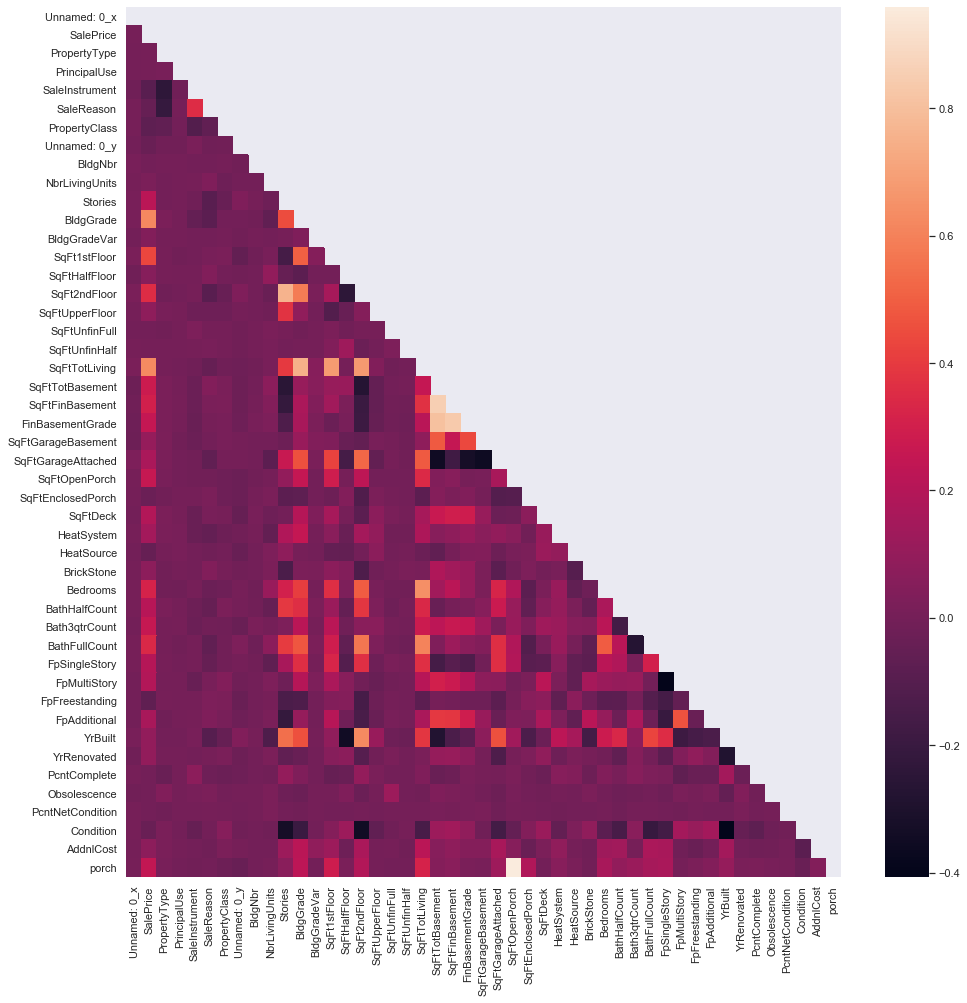

In [26]:
sns.set(rc={'figure.figsize':(16, 16)})
mask = np.triu(np.ones_like(sales_and_porch.corr(), dtype=np.bool))
sns.heatmap(sales_and_porch.corr(), mask=mask);
corrMatrix = sales_and_porch.corr()

In [29]:
fsm_df = pd.DataFrame([sales_and_porch.SalePrice,sales_and_porch.porch,])
fsm_df= fsm_df.transpose()
fsm_df

,SalePrice,porch
0,560000,180
1,435000,45
2,450000,110
3,950000,60
4,1445000,300
...,...,...
15857,3375000,110
15858,1250000,632
15859,1205000,130
15860,745000,450


In [30]:
fsm_df.corr()["SalePrice"]

SalePrice    1.000000
porch        0.248195
Name: SalePrice, dtype: float64

In [31]:
fsm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15862 entries, 0 to 15861
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   SalePrice  15862 non-null  int64
 1   porch      15862 non-null  int64
dtypes: int64(2)
memory usage: 1011.8 KB


In [32]:
fsm=cm_functions.get_fsm(fsm_df)

Rsquared: 0.061600516821035955
BETA values:
Intercept    747357.176050
porch        840.836163   
dtype: float64
------------------------------------
 
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     1041.
Date:                Fri, 19 Jun 2020   Prob (F-statistic):          2.76e-221
Time:                        12:59:09   Log-Likelihood:            -2.3229e+05
No. Observations:               15862   AIC:                         4.646e+05
Df Residuals:                   15860   BIC:                         4.646e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|    

06 of the variation within SalePrice can be explained 

In [33]:
fsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     1041.
Date:                Fri, 19 Jun 2020   Prob (F-statistic):          2.76e-221
Time:                        12:59:12   Log-Likelihood:            -2.3229e+05
No. Observations:               15862   AIC:                         4.646e+05
Df Residuals:                   15860   BIC:                         4.646e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.474e+05   5922.160    126.197      0.000    7.36e+05    7.59e+05
porch        840.8362     26.059     32.266      0.000     789.757     891.915
==============================================================================
Omnibus:                     7374.575   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            89807.755
Skew:                           1.918   Prob(JB):                         0.00
Kurtosis:                      14.008   Cond. No.                         306.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# We now begin to test out assumtpions. The first is homoscedasticity.

Lagrange Multiplier p-value: nan
F-statistic p-value: 0.0


The null hypothesis is homoscedasticity, alternative hypothesis is heteroscedasticity.    Thus returning a low p-value means that the current model violates the homoscedasticity assumption


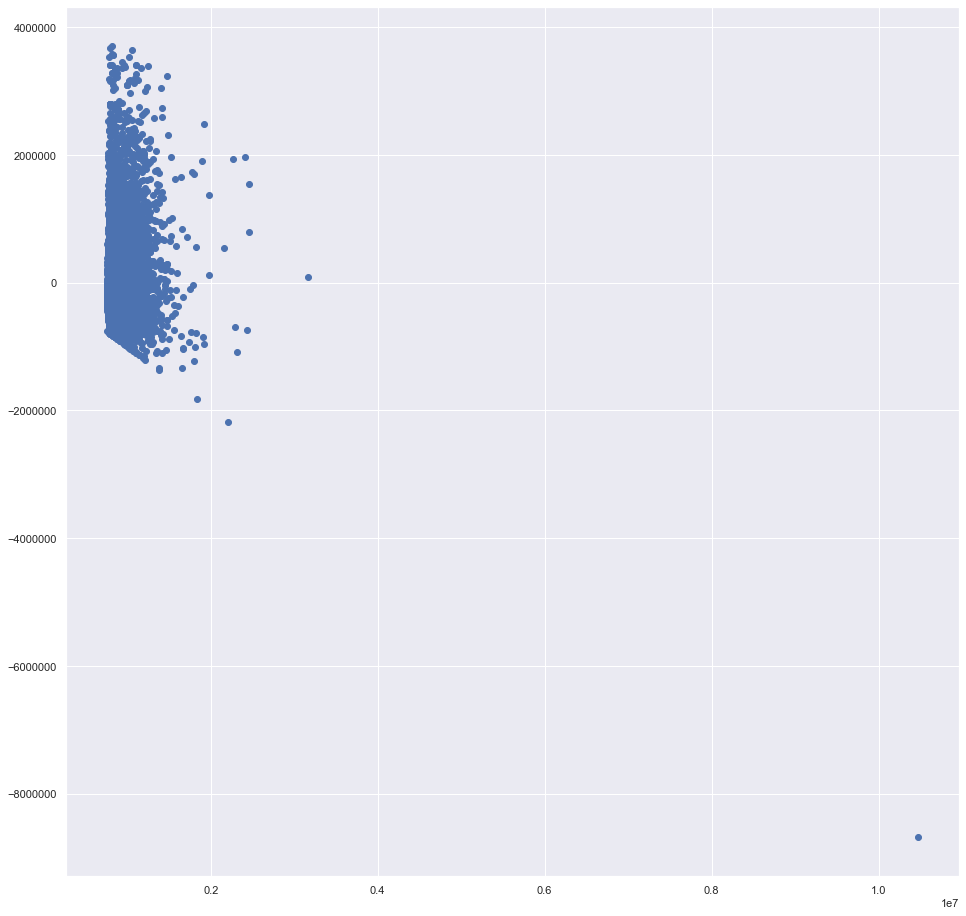

In [36]:
cm_functions.lr_homoscad(fsm, fsm_df)

## Based on our P value we fail the pass the homoscedasticity assumption. Therefore we must accept our Alternate hypothesis of heteroscedasticity.

# Next we will test for the Linearity assumption.

In [37]:
cm_functions.lr_linear(fsm)

Rainbow statistic: 1.1518164971650515
Rainbow p-value: 1.583452962362514e-10


(1.1518164971650515, 1.583452962362514e-10)

# Next we look at the Linearity assumption which we fail and can say our line is not entirely linear due to our low p value.

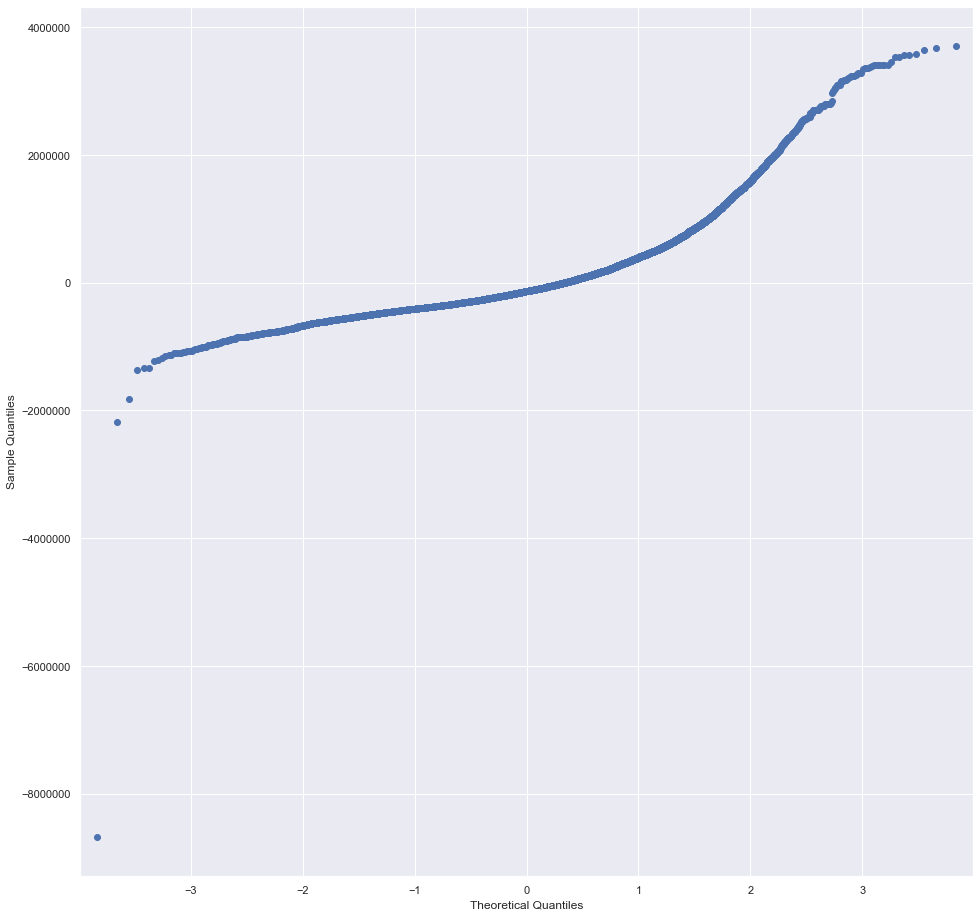

In [39]:
cm_functions.lr_normality(fsm)

# After by plotting our QQ-plot we can qualitatively see our ranibow test results are accurate and our values are not normally distributed, and non linear.